In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from scipy.stats import norm

from utilities import BasinhoppingWrapper, create_green_cm

In [214]:
from scipy.special import gamma

In [219]:
gamma(0.5)**2 / np.pi

0.99999999999999989

In [3]:
randn = np.random.randn

In [231]:
def scaled_inv_chi2(x, new=1, tau=1):
    a = (tau**2*new/2)**(new/2) / gamma(new/2)    
    return a * np.exp(-new*tau**2/(2*x)) / x**(1 + new/2)

(0, 0.1)

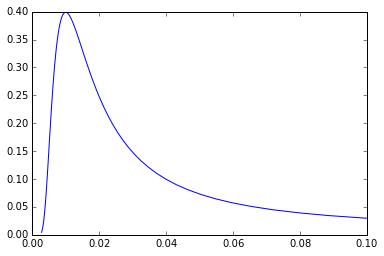

In [183]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

dwell_distance = 10 # mm
uncertainty = 3 # mm (1SD)

x = np.linspace(
    dwell_distance - uncertainty*3,
    dwell_distance + uncertainty*3, 100)
x = x[x>0]

val = -(x - dwell_distance)/uncertainty
y = norm.pdf(val)
ax.plot(x**-2, y)

ax.set_xlim([0,0.1])


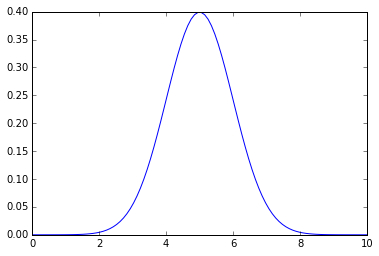

In [279]:
x = np.linspace(0, 10, 100)
y = norm.pdf(x - 5)
plt.plot(x, y)
# plt.xlim([0,0.1])
# plt.ylim(bottom=0)

(0, 0.1)

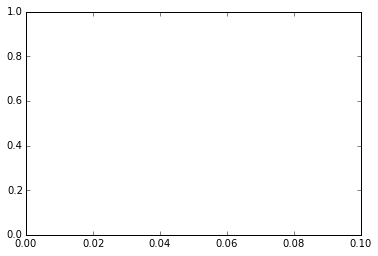

In [302]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([0,0.1])

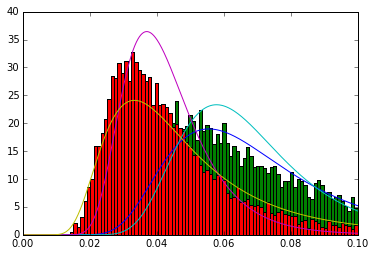

In [308]:
x = np.linspace(0.00001,0.1,1000)
y = scaled_inv_chi2(x, new=10, tau=0.2)
ax.plot(x,y)
fig

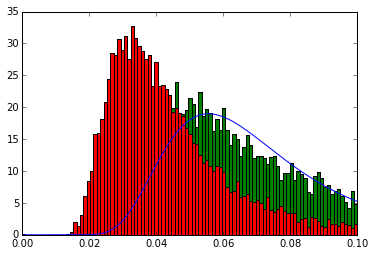

In [305]:
dwell_distance = 5
uncertainty = 1

test = (dwell_distance + randn(10000)*uncertainty)**-2
test = test[test<=0.1]


bins = np.linspace(0,0.1,100)
weights = np.ones_like(test)/len(test)
ax.hist(test, bins , normed=True)

ax.set_xlim([0,0.1])
fig

In [196]:
def inv_guass(x, lam=1, mu=1):
    return np.sqrt(lam/(2*np.pi * x**3) * np.exp(-lam*(x-mu)**2 / (2*x*mu**2)))

(0, 0.1)

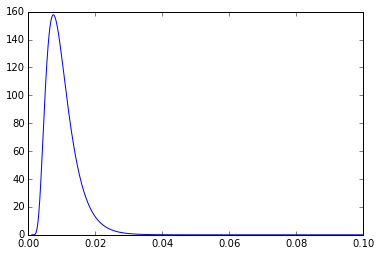

In [213]:
x = np.linspace(0.001,0.1,1000)
y = inv_guass(x, lam=0.1, mu=0.01)
plt.plot(x,y)
plt.xlim([0, 0.1])

(array([  9.99300000e+03,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  2.41255778e-03,   2.96403446e+00,   5.92565636e+00,
          8.88727826e+00,   1.18489002e+01,   1.48105221e+01,
          1.77721440e+01,   2.07337659e+01,   2.36953878e+01,
          2.66570097e+01,   2.96186315e+01]),
 <a list of 10 Patch objects>)

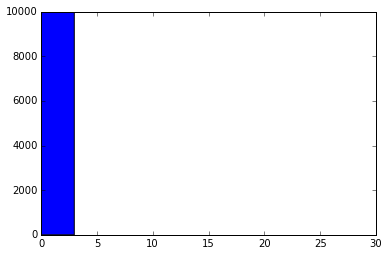

In [105]:
plt.hist(test_sort)

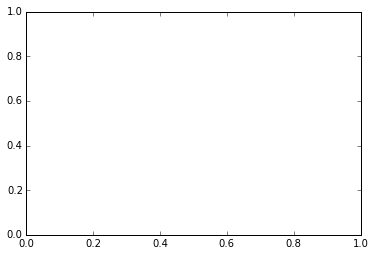

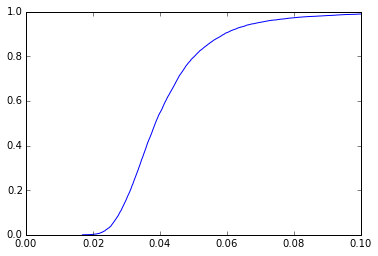

In [315]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

a = 10 + randn(10000)*2
b = 8 + randn(10000)*2
c = 11 + randn(10000)*2

total = 2*a**-2 + 0.5*b**-2 + c**-2

total_sort = np.sort(total)

y = np.arange(len(total_sort)) / len(total_sort)
ax.plot(total_sort, y)
ax.set_xlim([0,0.1]);

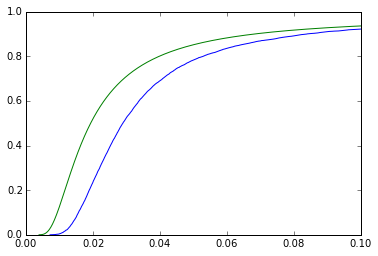

In [92]:
x = np.linspace(2, 16, 1000)
val_1 = -(x - 10)/uncertainty
y_1 = norm.cdf(val_1)

val_2 = -(x - 8)/uncertainty
y_2 = norm.cdf(val_2)

ax.plot(x**-2, (y_1 * y_2))

fig

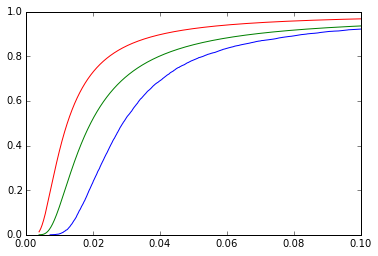

In [93]:
x = np.linspace(2, 16, 1000)
val_1 = -(x - 10)/uncertainty
y_1 = norm.cdf(val_1)

val_2 = -(x - 8)/uncertainty
y_2 = norm.cdf(val_2)

ax.plot(x**-2, (y_1 + y_2)/2)

fig

In [ ]:
fft_of_rows = numpy.fft.rfft(rows)
fft_of_convolution = fft_of_rows.prod(axis=0)
convolution = numpy.fft.irfft(fft_of_convolution)